## üêº **Pandas Zoo** (R)

l contexto de an√°lisis de datos que elegimos fue el de **visitas a un zool√≥gico**. Para ello, crearemos cinco datasets en los que almacenaremos la siguiente informaci√≥n:

- **Entradas vendidas**
- **H√°bitats disponibles para visitar**
- **Shows disponibles para visitar**
- **Relaci√≥n entre entradas vendidas y visitas a h√°bitats**, incluyendo el nivel de satisfacci√≥n de dichas visitas
- **Relaci√≥n entre entradas vendidas y visitas a shows**, tambi√©n con sus respectivos niveles de satisfacci√≥n

Elegimos este contexto por el **potencial de an√°lisis** que ofrece, ya que estos centros reciben grandes cantidades de personas. Identificar las **preferencias del p√∫blico** permitir√≠a **aumentar las ganancias** del zool√≥gico, al manejar la oferta de servicios de acuerdo a estas.


## üìä **Preguntas de investigaci√≥n**

- ¬øQu√© d√≠as de la semana hay una mayor frecuencia de visitantes seg√∫n cada rango etario?
- ¬øEn qu√© meses hay una mayor frecuencia de visitantes?
- ¬øExiste alguna relaci√≥n entre el tipo de ambiente de cada h√°bitat y la frecuencia de visitas?
- ¬øLa duraci√≥n de los shows afecta la preferencia de los diferentes rangos etarios?
- ¬øEn qu√© horario se concentra la mayor cantidad de visitas?
- ¬øLa presencia de comercios en los h√°bitats afecta la satisfacci√≥n de los visitantes?
- ¬øLa posibilidad de consumir alimentos dentro de los h√°bitats influye en la cantidad de visitas?
- ¬øExiste una correlaci√≥n entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacci√≥n de los visitantes?
- ¬øExiste una correlaci√≥n entre el tipo de entrada (VIP) y el nivel de satisfacci√≥n de los visitantes?
- ¬øLa adquisici√≥n de entradas VIP se relaciona con la asistencia a shows?
- ¬øExiste una correlaci√≥n entre la cantidad de especies en un h√°bitat y el n√∫mero de visitas anuales?

## Objetivo
Aplicar las funcionalidades del legnuaje R a los datos obtenidos en la Unidad anterior y comparar la capacidad de an√°lisis de datos con respecto a Pandas.

In [30]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyr)

entradas_limpio <- read.csv("./zoo_dataset/entradas_zoo_limpio.csv")
habitats_limpio <- read.csv("./zoo_dataset/habitats_generado.csv")
shows <- read.csv("./zoo_dataset/shows_generado.csv")
entradas_habitats_limpio <- read.csv("./zoo_dataset/visitas_habitats_limpio.csv")
entradas_shows_limpio <- read.csv("./zoo_dataset/visitas_shows_limpio.csv")
visitas_habitats_limpio <- read.csv("./zoo_dataset/visitas_habitats_limpio.csv")

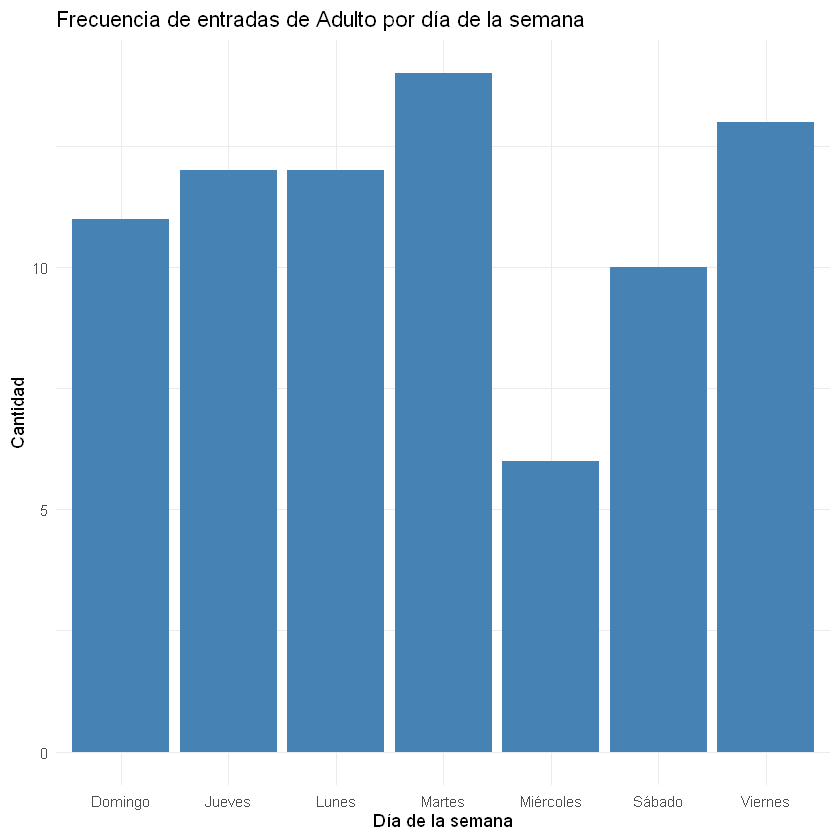

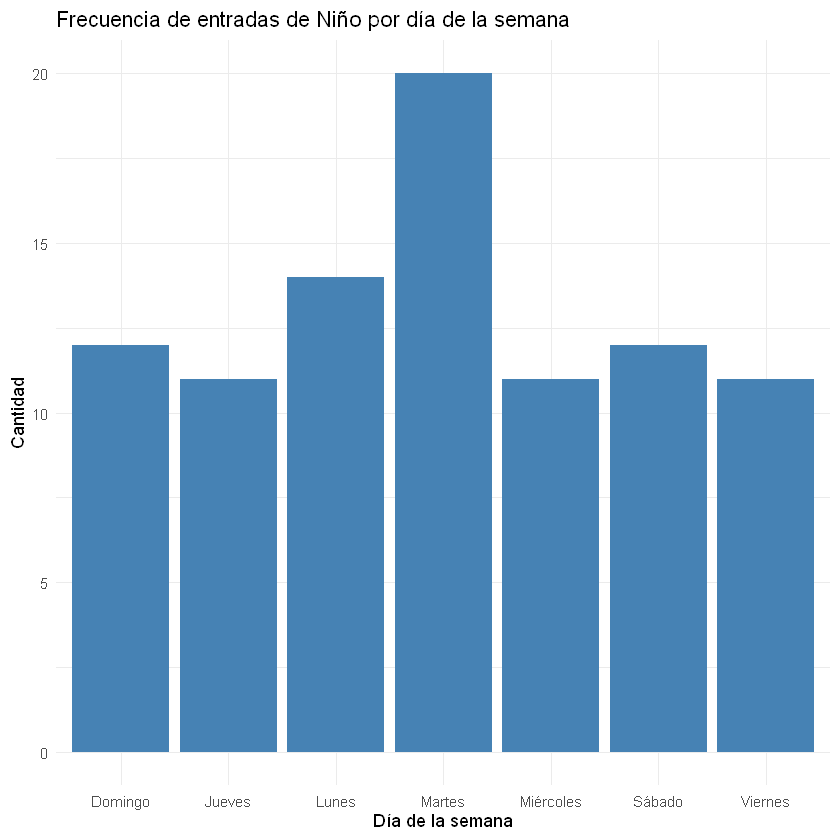

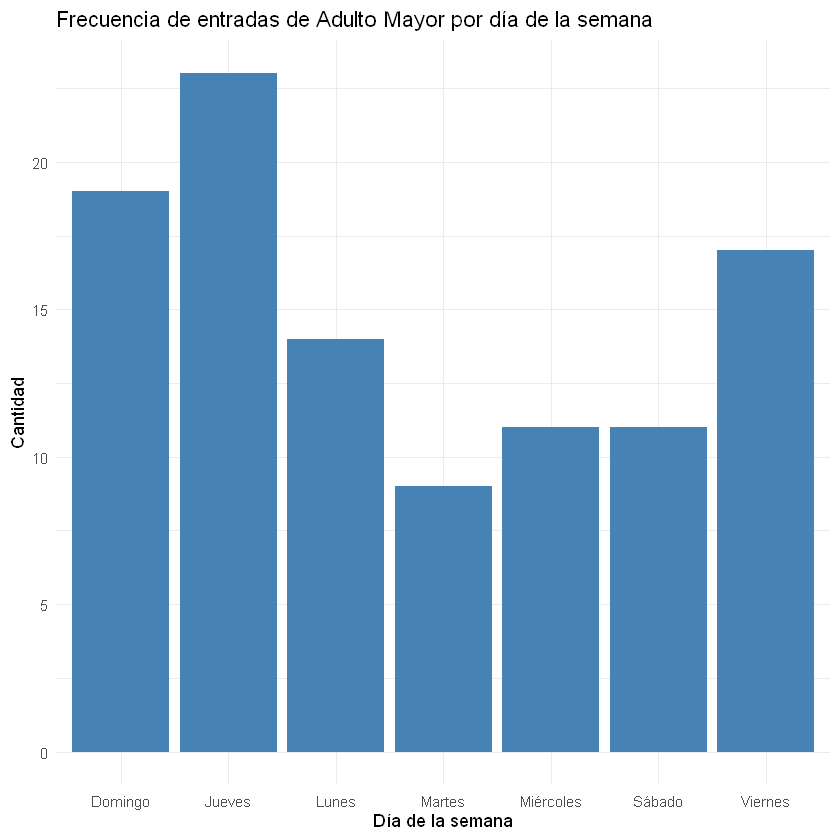

In [2]:
generar_grafico_1 <- function(dataframe, rango_etario_arg) {
  entradas_filtradas <- dataframe %>%
    filter(rango_etario == rango_etario_arg) %>%
    count(d√≠a_semana)

  ggplot(entradas_filtradas, aes(x = d√≠a_semana, y = n)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(
      title = paste("Frecuencia de entradas de", rango_etario_arg, "por d√≠a de la semana"),
      x = "D√≠a de la semana",
      y = "Cantidad"
    ) +
    theme_minimal()
}

rango_etarios <- c("Adulto", "Ni√±o", "Adulto Mayor")

# Generar un gr√°fico por rango etario
for (edad in rango_etarios) {
  print(generar_grafico_1(entradas_limpio, edad))
}

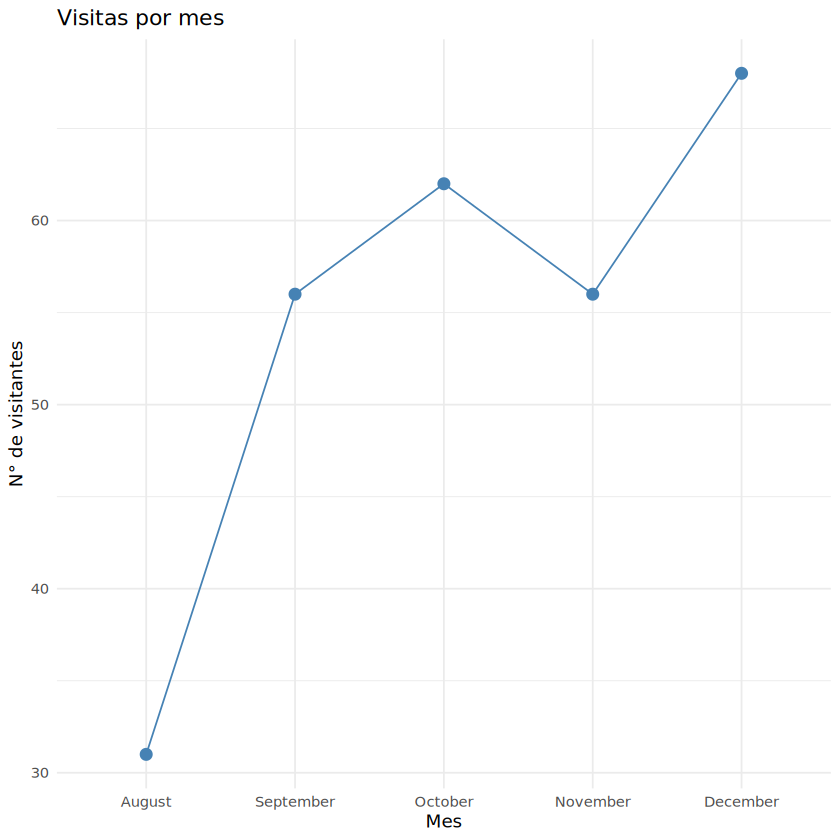

In [ ]:
entradas <- entradas_limpio %>%
  mutate(
    fecha = dmy(fecha),
    mes = month(fecha),
    mes_nombre = month(fecha, label = TRUE, abbr = FALSE)
  )

# Contar visitas por mes
conteo_mes <- entradas %>%
  count(mes, mes_nombre) %>%
  arrange(mes)

# Graficar
ggplot(conteo_mes, aes(x = mes_nombre, y = n, group = 1)) +
  geom_line(color = "steelblue") +
  geom_point(size = 3, color = "steelblue") +
  labs(
    title = "Visitas por mes",
    x = "Mes",
    y = "N¬∞ de visitantes"
  ) +
  theme_minimal()

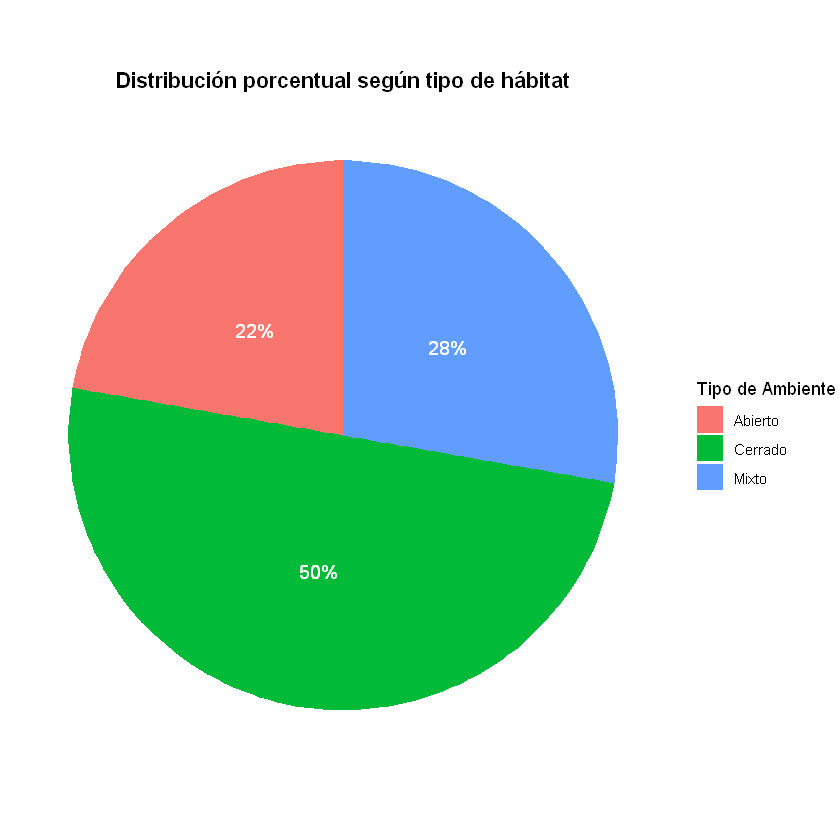

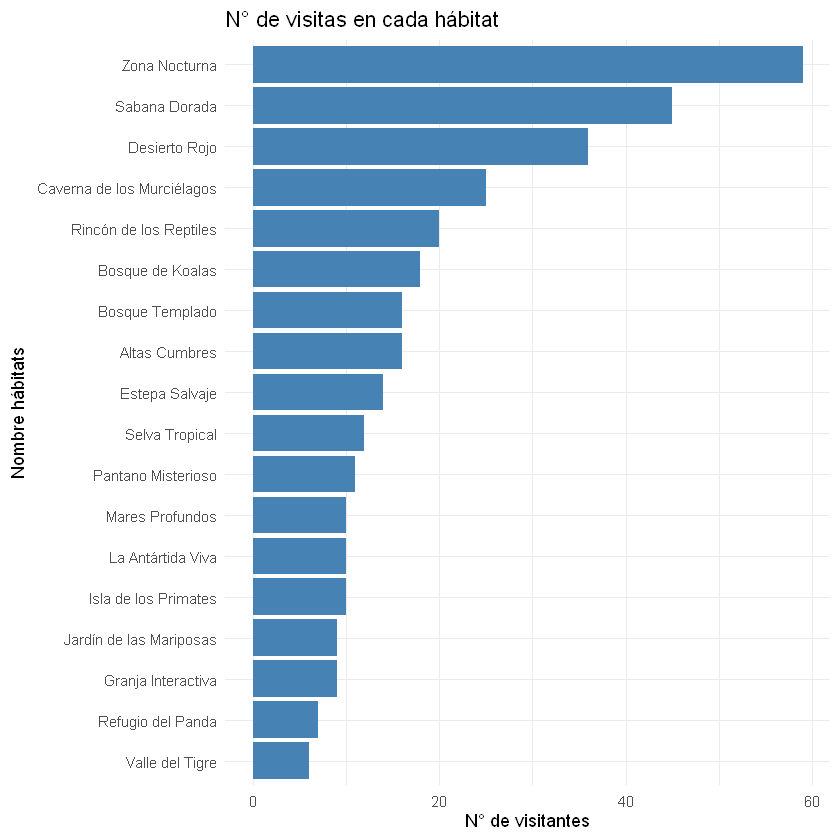

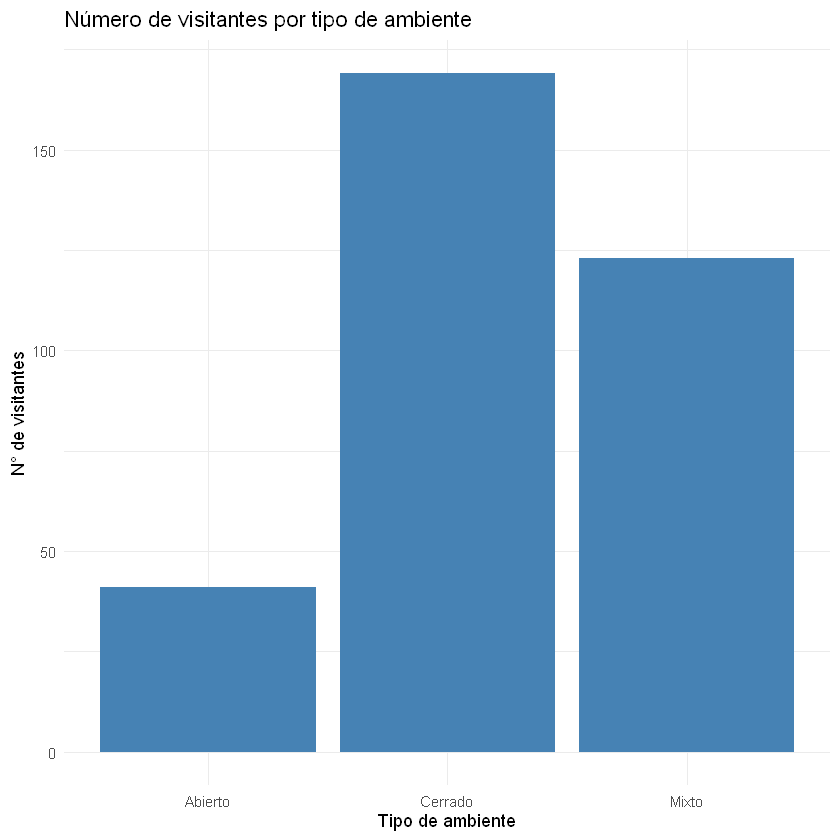

In [39]:
left_join_entradas_habitats <- entradas_habitats_limpio %>%
    left_join(habitats_limpio, by = "ID_habitat")

tipo_habitats <- habitats_limpio %>%
    select(nombre_habitat, tipo_ambiente)

conteo_para_pie <- tipo_habitats %>%
    count(tipo_ambiente) %>%
    mutate(
        prop = n / sum(n),
        ypos = 1 - (cumsum(n) - 0.5 * n) / sum(n),
        label_texto = paste0(round(prop * 100, 0), "%")
    )

ggplot(conteo_para_pie, aes(x = "", y = prop, fill = tipo_ambiente)) +
    geom_col(width = 1) +
    coord_polar("y", start = 0) +
    geom_text(aes(y = ypos, label = label_texto), color = "white", size = 4) +
    labs(
        title = "Distribuci√≥n porcentual seg√∫n tipo de h√°bitat",
        fill = "Tipo de Ambiente"
    ) +
    theme_void() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))


conteo_tipo_habitats_entradas <- left_join_entradas_habitats %>%
    count(nombre_habitat)

ggplot(conteo_tipo_habitats_entradas, aes(x = n, y = reorder(nombre_habitat, n))) +
    geom_col(fill = "steelblue") +
    labs(
        title = "N¬∞ de visitas en cada h√°bitat",
        x = "N¬∞ de visitantes",
        y = "Nombre h√°bitats"
    ) +
    theme_minimal()

conteo_entradas <- left_join_entradas_habitats %>%
    count(tipo_ambiente)

ggplot(conteo_entradas, aes(x = tipo_ambiente, y = n)) +
    geom_col(fill = "steelblue") +
    labs(
        title = "N√∫mero de visitantes por tipo de ambiente",
        x = "Tipo de ambiente",
        y = "N¬∞ de visitantes"
    ) +
    theme_minimal()

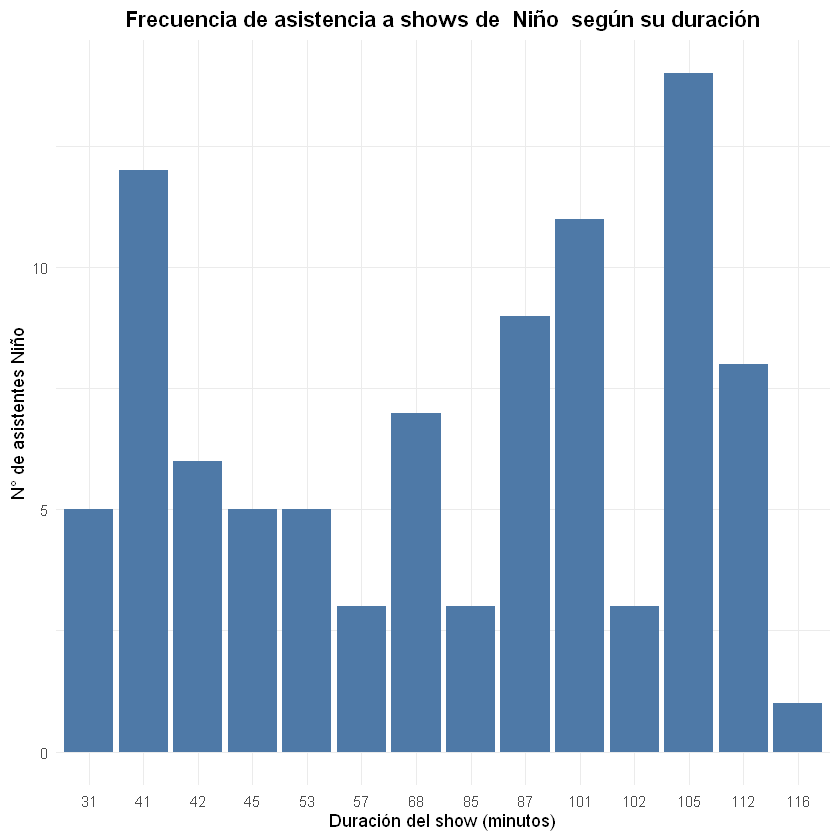

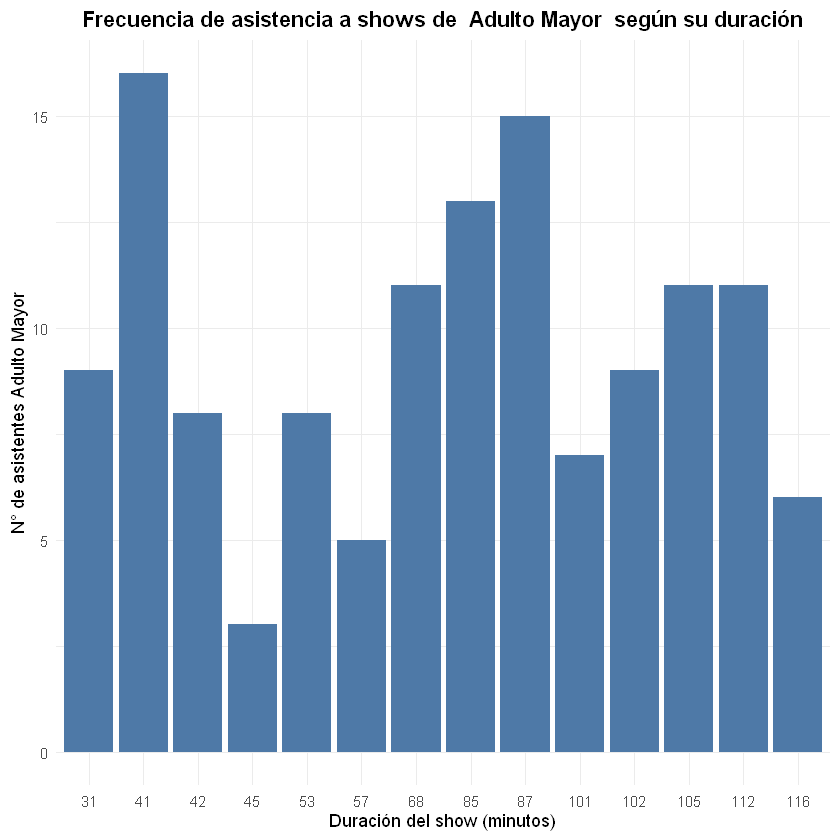

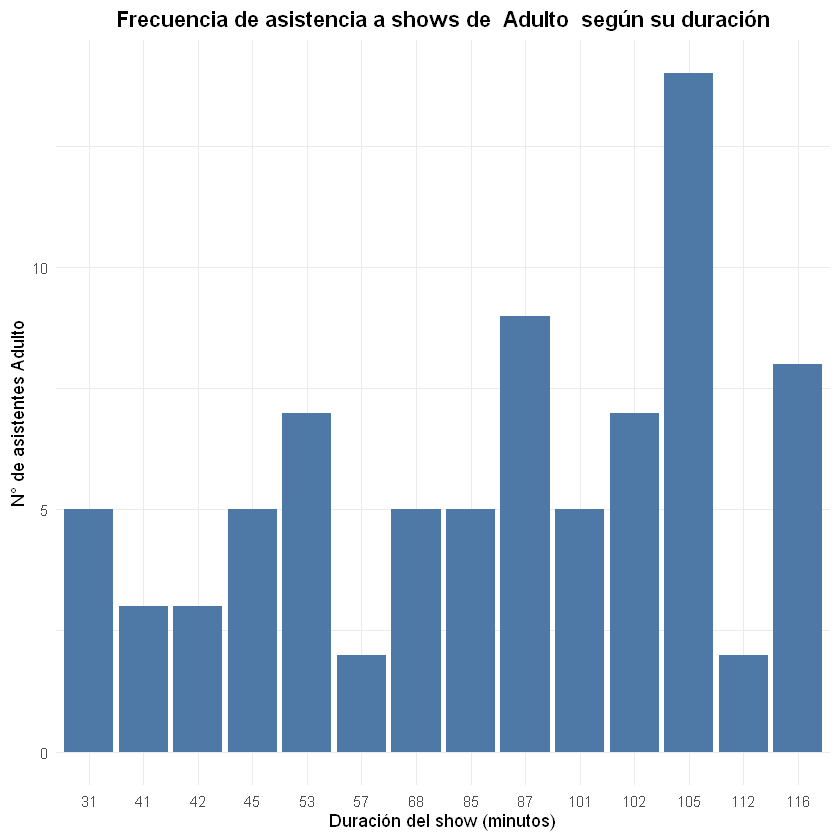

In [13]:

left_join_entradas_shows <- left_join(entradas_shows_limpio, shows, by = "ID_show")
left_join_entradas_shows_rango_etario <- left_join(
  left_join_entradas_shows,
  select(entradas_limpio, ID_entrada, rango_etario),
  by = "ID_entrada"
)

lista_rangos_etarios <- unique(left_join_entradas_shows_rango_etario$rango_etario)

for (rango in lista_rangos_etarios) {
  
  datos_filtrados <- left_join_entradas_shows_rango_etario %>%
    filter(rango_etario == rango) %>%
    filter(duracion != "NULL") %>%
    mutate(duracion = as.numeric(duracion))
  
  plot <- ggplot(datos_filtrados, aes(x = reorder(factor(duracion), duracion))) +
    geom_bar(fill = "#4e79a7") +
    labs(
      title = paste("Frecuencia de asistencia a shows de ", rango, " seg√∫n su duraci√≥n"),
      x = "Duraci√≥n del show (minutos)",
      y = paste("N¬∞ de asistentes", rango)
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold")
    )
  
  print(plot)
}

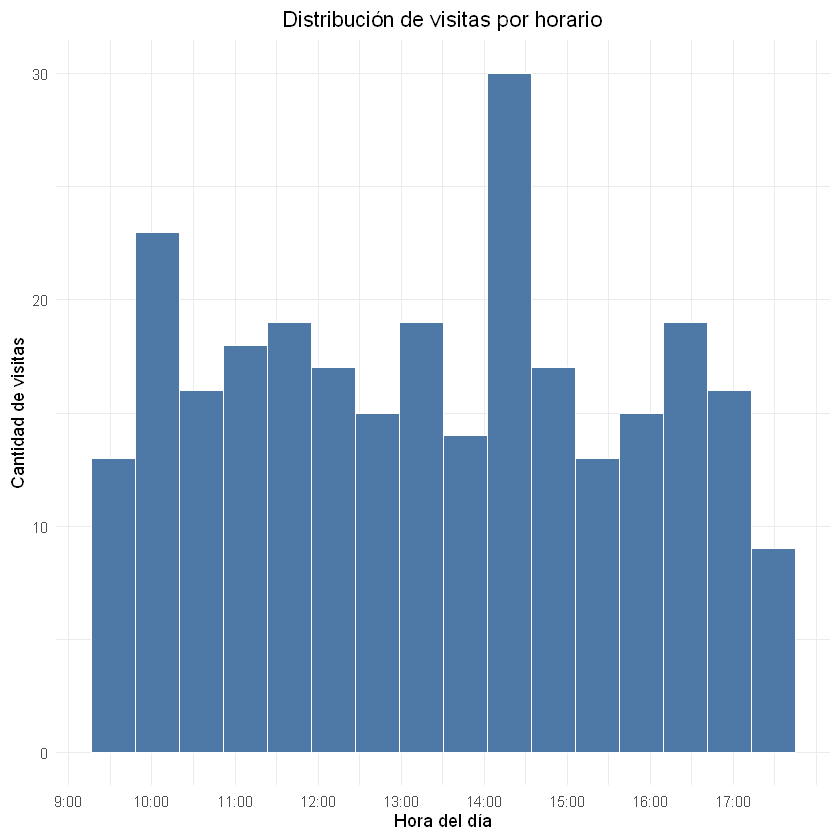

In [14]:
entradas_con_hora <- entradas_limpio %>%
  mutate(
    hora_parsed = hm(hora_ingreso),
    hora_decimal = hour(hora_parsed) + minute(hora_parsed) / 60
  )

ggplot(entradas_con_hora, aes(x = hora_decimal)) +
  geom_histogram(bins = 16, fill = "#4e79a7", color = "white") +
  scale_x_continuous(
    breaks = 9:17,
    labels = paste0(9:17, ":00")
  ) +
  labs(
    title = "Distribuci√≥n de visitas por horario",
    x = "Hora del d√≠a",
    y = "Cantidad de visitas"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

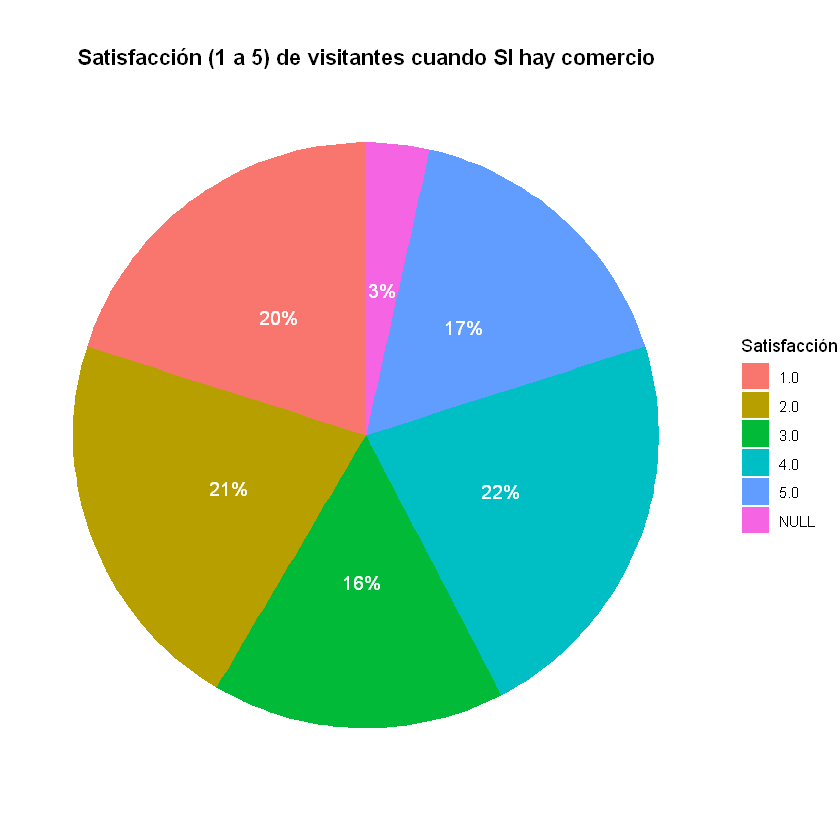

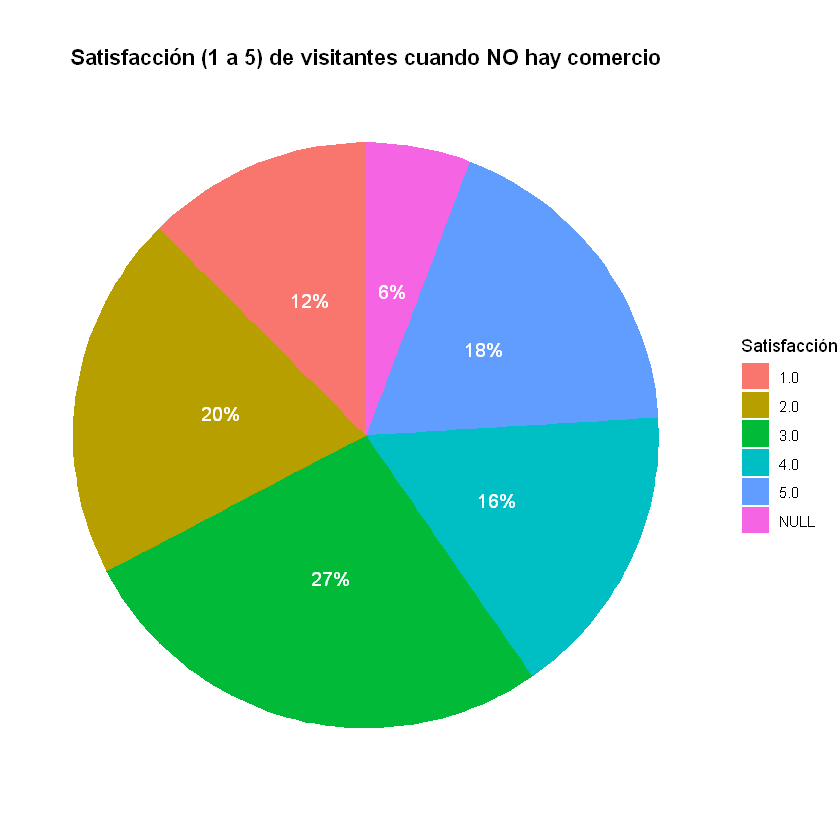

In [25]:
left_join_entradas_habitats <- left_join(
  entradas_habitats_limpio, 
  habitats_limpio, 
  by = "ID_habitat"
)

for (comercio_valor in unique(left_join_entradas_habitats$comercio)) {
  
  conteo_satisfaccion <- left_join_entradas_habitats %>%
    filter(comercio == comercio_valor) %>%
    mutate(satisfaccion_str = as.character(satisfaccion),
           satisfaccion_str = if_else(is.na(satisfaccion_str), "No responde", satisfaccion_str)) %>%
    count(satisfaccion_str, name = "n") %>%
    mutate(
      prop = n / sum(n),
      ypos = 1 - (cumsum(n) - 0.5 * n) / sum(n)
    )
  
  titulo_comercio <- if (comercio_valor) "SI" else "NO"
  
  plot <- ggplot(conteo_satisfaccion, aes(x = "", y = prop, fill = satisfaccion_str)) +
    geom_col(width = 1) +
    coord_polar(theta = "y") +
    geom_text(aes(y = ypos, label = paste0(round(prop * 100, 0), "%")), color = "white", size = 4) + # The change is here
    labs(
      title = paste("Satisfacci√≥n (1 a 5) de visitantes cuando", titulo_comercio, "hay comercio"),
      fill = "Satisfacci√≥n"
    ) +
    theme_void() +
    theme(plot.title = element_text(hjust = 0.5, face = "bold"))
  
  print(plot)
}

  permite_alimentos_label cantidad_visitas
1    No Permite Alimentos              168
2    S√≠ Permite Alimentos              165


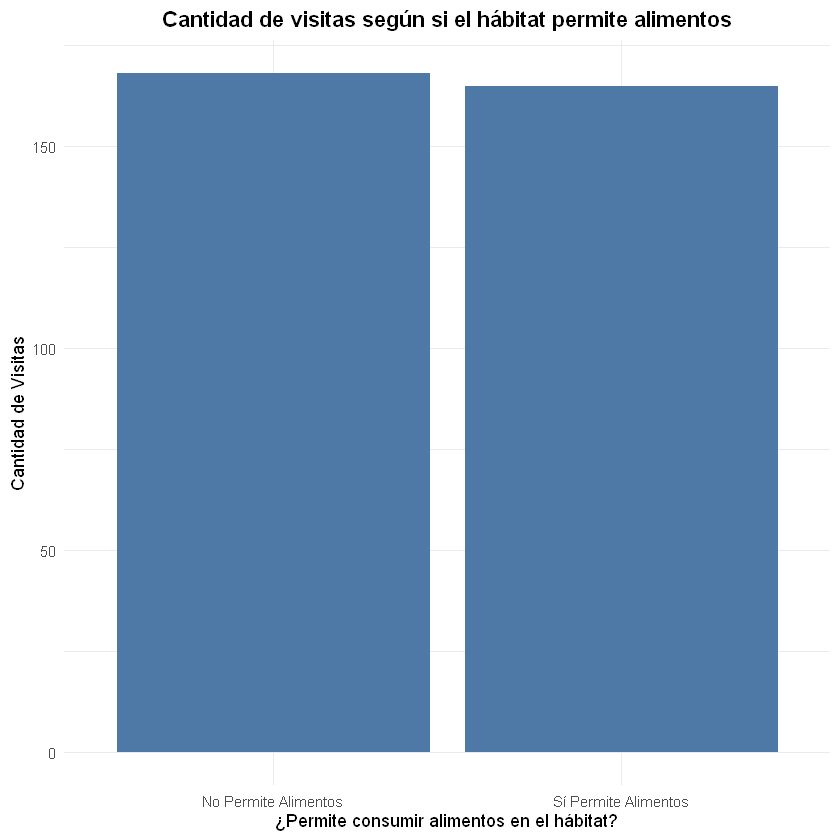

In [28]:
visitas_por_permiso_alimentos <- left_join_entradas_habitats %>%
  mutate(
    permite_alimentos_label = case_when(
      permite_alimentos %in% c("True", "true")   ~ "S√≠ Permite Alimentos",
      permite_alimentos %in% c("False", "false") ~ "No Permite Alimentos",
      TRUE                                      ~ "No Especificado"
    )
  ) %>%
  count(permite_alimentos_label, name = "cantidad_visitas")

print(visitas_por_permiso_alimentos)

ggplot(visitas_por_permiso_alimentos, aes(x = permite_alimentos_label, y = cantidad_visitas)) +
  geom_col(fill = "#4e79a7") +
  labs(
    title = "Cantidad de visitas seg√∫n si el h√°bitat permite alimentos",
    x = "¬øPermite consumir alimentos en el h√°bitat?",
    y = "Cantidad de Visitas"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
‚Ñπ In argument: `cupos_ocupados = as.numeric(cupos_ocupados)`.
Caused by warning:
! NAs introduced by coercion
‚Ñπ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


[1] "Correlaci√≥n entre porcentaje de ocupaci√≥n y satisfacci√≥n: -0.06"


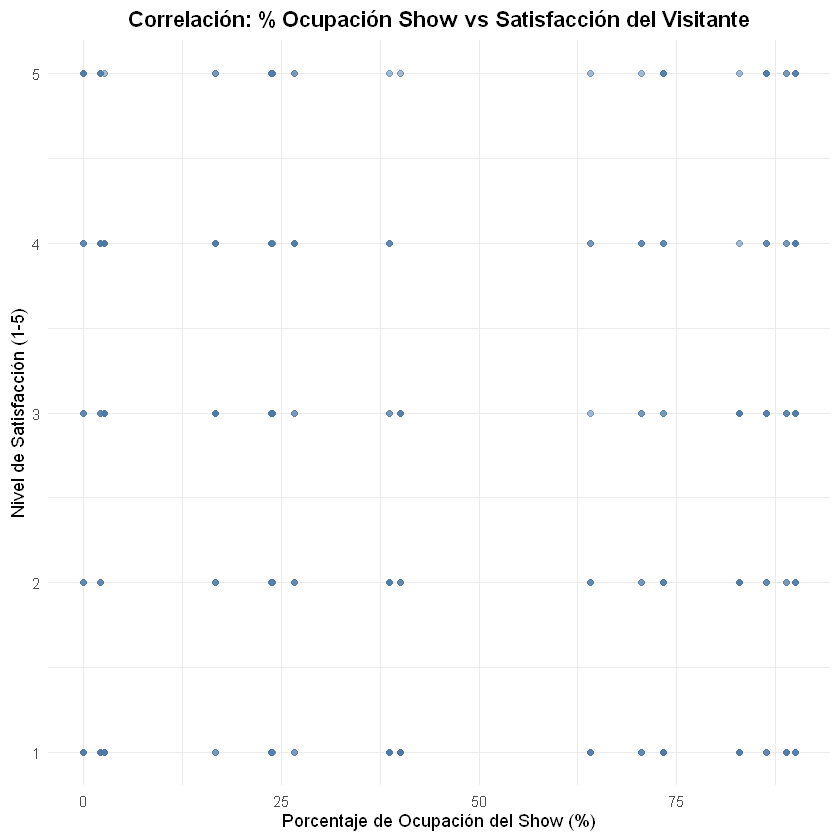

In [34]:
# 1. Join the dataframes
merged_shows_satisfaccion <- left_join(entradas_shows_limpio, shows, by = "ID_show")

# 2. Convert ALL relevant columns to numeric, calculate occupancy, and remove NAs
data_q8 <- merged_shows_satisfaccion %>%
  mutate(
    # First, convert all columns that should be numbers
    cupos_ocupados = as.numeric(cupos_ocupados),
    cupos_totales = as.numeric(cupos_totales),
    satisfaccion = as.numeric(satisfaccion), # <-- This line fixes the error
    
    # Then, use the newly numeric columns for the calculation
    porcentaje_ocupacion = if_else(cupos_totales > 0, (cupos_ocupados / cupos_totales) * 100, 0.0)
  ) %>%
  drop_na(satisfaccion, porcentaje_ocupacion) # This removes rows where conversion failed

# 3. Calculate the correlation
correlation_q8 <- cor(data_q8$porcentaje_ocupacion, data_q8$satisfaccion)

# 4. Print the formatted correlation result
print(sprintf("Correlaci√≥n entre porcentaje de ocupaci√≥n y satisfacci√≥n: %.2f", correlation_q8))

# 5. Create and display the scatter plot
ggplot(data_q8, aes(x = porcentaje_ocupacion, y = satisfaccion)) +
  geom_point(alpha = 0.5, color = "#4e79a7") +
  labs(
    title = "Correlaci√≥n: % Ocupaci√≥n Show vs Satisfacci√≥n del Visitante",
    x = "Porcentaje de Ocupaci√≥n del Show (%)",
    y = "Nivel de Satisfacci√≥n (1-5)"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Warning message:
"There was 1 warning in `mutate()`.
‚Ñπ In argument: `satisfaccion = as.numeric(satisfaccion)`.
Caused by warning:
! NAs introduced by coercion"


[1] "Correlaci√≥n (punto biserial) entre entrada VIP y satisfacci√≥n en h√°bitats: 0.02"


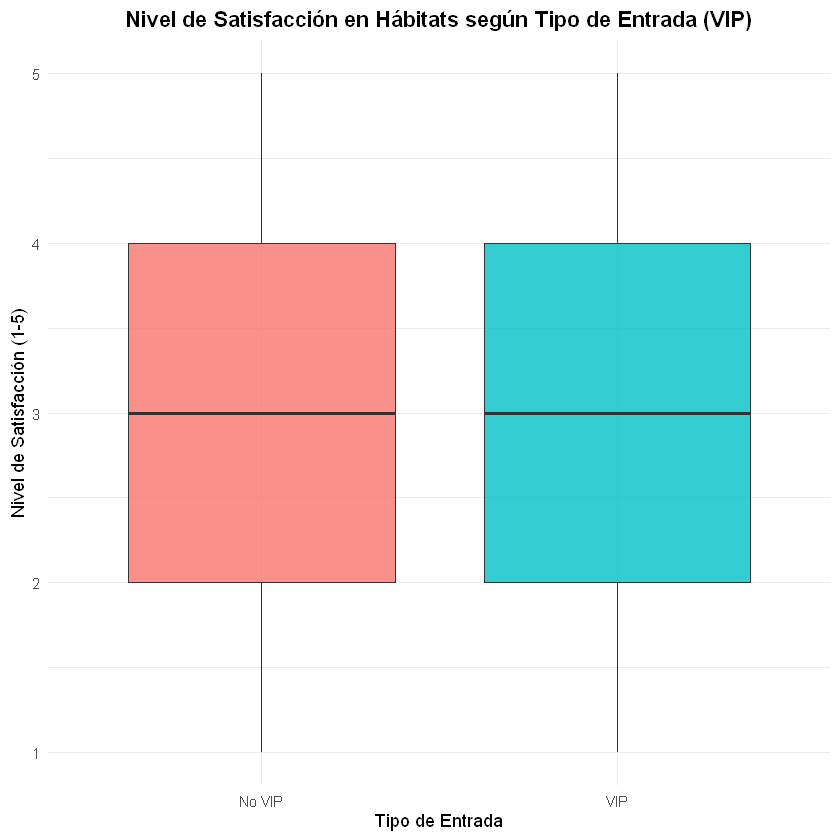

In [ ]:
merged_vip_satisfaccion_habitat <- left_join(
  entradas_habitats_limpio, 
  select(entradas_limpio, ID_entrada, VIP), 
  by = "ID_entrada"
)

data_q9 <- merged_vip_satisfaccion_habitat %>%
  mutate(
    satisfaccion = as.numeric(satisfaccion),
    VIP_str = tolower(as.character(VIP)),
    VIP_numeric = case_when(
      VIP_str %in% c("true", "si", "1", "1.0") ~ 1,
      VIP_str %in% c("false", "no", "0", "0.0") ~ 0
    ),
    VIP_label = if_else(VIP_numeric == 1, "VIP", "No VIP")
  ) %>%
  drop_na(satisfaccion, VIP_numeric)

correlation_q9 <- cor(data_q9$VIP_numeric, data_q9$satisfaccion)
print(sprintf("Correlaci√≥n (punto biserial) entre entrada VIP y satisfacci√≥n en h√°bitats: %.2f", correlation_q9))

ggplot(data_q9, aes(x = VIP_label, y = satisfaccion, fill = VIP_label)) +
  geom_boxplot(alpha = 0.8) +
  labs(
    title = "Nivel de Satisfacci√≥n en H√°bitats seg√∫n Tipo de Entrada (VIP)",
    x = "Tipo de Entrada",
    y = "Nivel de Satisfacci√≥n (1-5)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

[1] "Tabla de contingencia VIP vs Asistencia a Shows:"
       Asistio_Show
VIP     FALSE TRUE
  False    36  109
  True     44   84


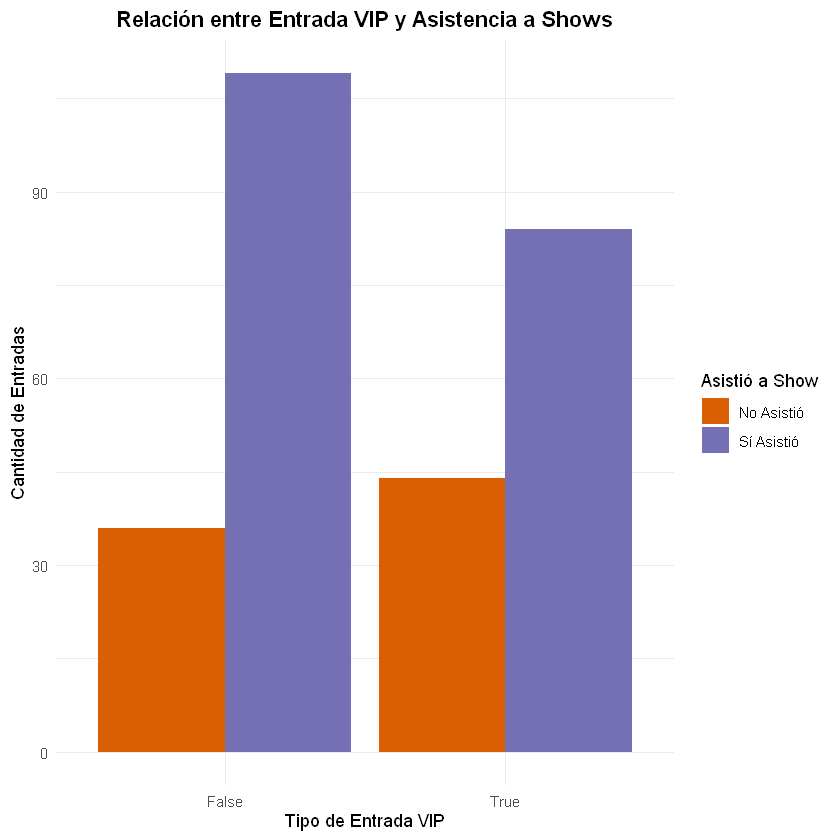

In [37]:

ids_asistieron_shows <- unique(entradas_shows_limpio$ID_entrada)

entradas_con_asistencia <- entradas_limpio %>%
  mutate(asistio_show = ID_entrada %in% ids_asistieron_shows)

contingency_table_q10 <- table(
  VIP = entradas_con_asistencia$VIP, 
  Asistio_Show = entradas_con_asistencia$asistio_show
)
print("Tabla de contingencia VIP vs Asistencia a Shows:")
print(contingency_table_q10)

ggplot(entradas_con_asistencia, aes(x = as.factor(VIP), fill = as.factor(asistio_show))) +
  geom_bar(position = "dodge") +
  scale_fill_manual(
    name = "Asisti√≥ a Show",
    values = c("FALSE" = "#d95f02", "TRUE" = "#7570b3"),
    labels = c("No Asisti√≥", "S√≠ Asisti√≥")
  ) +
  labs(
    title = "Relaci√≥n entre Entrada VIP y Asistencia a Shows",
    x = "Tipo de Entrada VIP",
    y = "Cantidad de Entradas"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

[1] "Correlaci√≥n entre cantidad de especies y n√∫mero de visitas: -0.27"
[1] "Datos usados para el gr√°fico de Q11 (especies vs visitas):"
               nombre_habitat cantidad_especies numero_visitas
1              Selva Tropical                 2             12
2               Sabana Dorada                 1             45
3  Caverna de los Murci√©lagos                 4             25
4          Pantano Misterioso                 4             11
5             Bosque Templado                 4             16
6      Rinc√≥n de los Reptiles                 2             20
7               Altas Cumbres                 3             16
8             Mares Profundos                 2             10
9        Isla de los Primates                 2             10
10            Valle del Tigre                 3              6
11             Estepa Salvaje                 2             14
12          Refugio del Panda                 4              7
13    Jard√≠n de las Mariposas         

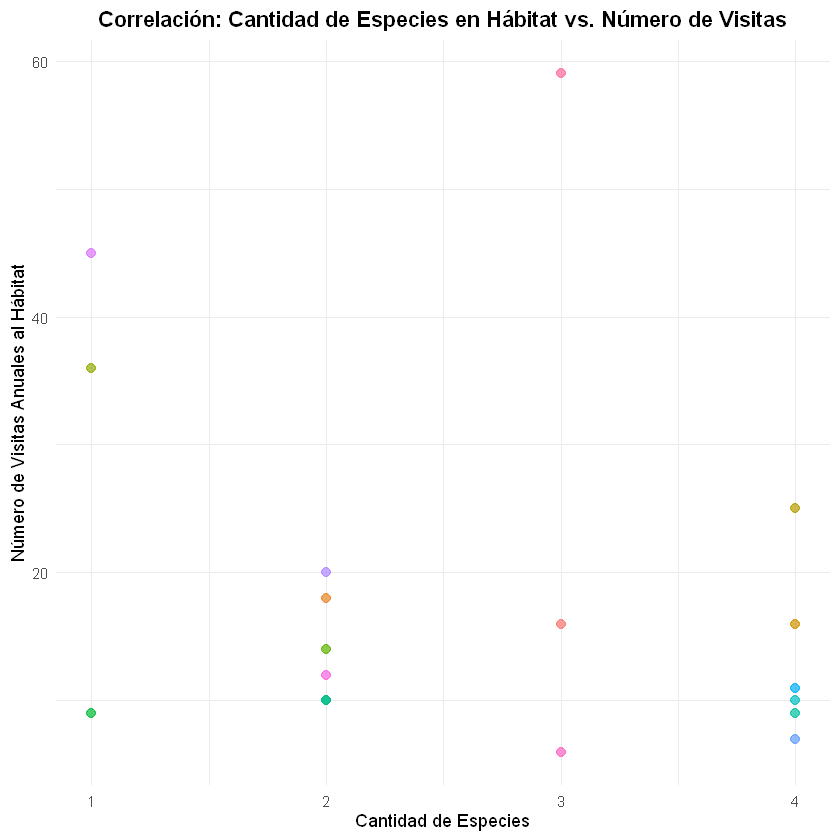

In [ ]:

data_q11 <- entradas_habitats_limpio %>%
  count(ID_habitat, name = "numero_visitas") %>%
  left_join(select(habitats_limpio, ID_habitat, cantidad_especies, nombre_habitat), by = "ID_habitat") %>%
  drop_na(numero_visitas, cantidad_especies)

correlation_q11 <- cor(data_q11$cantidad_especies, data_q11$numero_visitas)
print(sprintf("Correlaci√≥n entre cantidad de especies y n√∫mero de visitas: %.2f", correlation_q11))

print("Datos usados para el gr√°fico de Q11 (especies vs visitas):")
print(select(data_q11, nombre_habitat, cantidad_especies, numero_visitas))

ggplot(data_q11, aes(x = cantidad_especies, y = numero_visitas, color = nombre_habitat)) +
  geom_point(alpha = 0.7, size = 2.5) +
  labs(
    title = "Correlaci√≥n: Cantidad de Especies en H√°bitat vs. N√∫mero de Visitas",
    x = "Cantidad de Especies",
    y = "N√∫mero de Visitas Anuales al H√°bitat"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold")
  )

## ¬ÆÔ∏è vs üêç **Comparativa con Python**

Blabalbal blabla bla

Pregunta 1
(foto grafico R) (foto grafico python)

Pregunta 2
(foto grafico R) (foto grafico python)

etc etc
